<a href="https://colab.research.google.com/github/oliwierurban/POSI/blob/main/Cwiczenia7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 7

## Wprowadzenie

### Skalowanie danych

Skalowanie danych to proces przekształcania wartości cech (features), aby znajdowały się w podobnym zakresie.  
Celem jest poprawa działania algorytmów uczących się (np. regresji liniowej, k-NN, SVM), które są wrażliwe na różnice w skali danych.

<br>

Skalowanie **nie zmienia kształtu rozkładu danych**, ale zapewnia porównywalność cech, co **przyspiesza i stabilizuje** proces uczenia modeli.


#### Najczęstsze metody skalowania

##### **Standaryzacja (Standardization / Z-score Normalization)**

Przekształca dane tak, by miały **średnią 0** i **odchylenie standardowe 1**:

$$
x' = \frac{x - \mu}{\sigma}
$$

gdzie:  
- $ x $ – oryginalna wartość,  
- $ \mu $ – średnia wartości cechy,  
- $ \sigma $ – odchylenie standardowe.



##### **Normalizacja (Min-Max Scaling)**

Przekształca dane do zadanego przedziału (zazwyczaj $ [0, 1] $):

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

gdzie:  
- $ x_{\min} $, $ x_{\max} $ – minimalna i maksymalna wartość cechy.


##### **MaxAbs Scaling**

Używana przy danych zawierających wartości ujemne, skaluje do przedziału $ [-1, 1] $:

$$
x' = \frac{x}{|x_{\max}|}
$$

#### Przykład skalowania danych w Python

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = {
    'Wzrost': [160, 170, 180, 190],
    'Waga': [55, 65, 80, 95]
}

df = pd.DataFrame(data)
print(df)

# Standaryzacja (średnia = 0, odchylenie std = 1)
scaler_std = StandardScaler()
df_standard = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

print("\n Dane po standaryzacji:")
print(df_standard)

# Normalizacja (zakres [0, 1])
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

print("\n Dane po normalizacji:")
print(df_minmax)


   Wzrost  Waga
0     160    55
1     170    65
2     180    80
3     190    95

 Dane po standaryzacji:
     Wzrost      Waga
0 -1.341641 -1.237179
1 -0.447214 -0.577350
2  0.447214  0.412393
3  1.341641  1.402136

 Dane po normalizacji:
     Wzrost   Waga
0  0.000000  0.000
1  0.333333  0.250
2  0.666667  0.625
3  1.000000  1.000


### Sieć neuronowa

#### Czym jest sieć neuronowa?
**Sieć neuronowa** to model matematyczny inspirowany sposobem działania biologicznego mózgu,
służący do rozpoznawania wzorców i przetwarzania danych. Składa się z warstw połączonych ze sobą
**neuronów** (węzłów), które przekształcają dane wejściowe w dane wyjściowe.

Sieć neuronowa składa się z połączonych ze sobą „neuronów” (czyli prostych jednostek obliczeniowych), ułożonych warstwowo:

- Warstwa wejściowa (input layer) – przyjmuje dane (np. piksele obrazu, liczby, tekst).

- Warstwy ukryte (hidden layers) – przetwarzają dane, ucząc się złożonych zależności i wzorców.

- Warstwa wyjściowa (output layer) – zwraca wynik (np. etykietę klasy, przewidywaną wartość, odpowiedź tekstową).



#### Funkcje aktywacji (przykłady)

- Funkcja sigmoidalna:
  $$
  f(x) = \frac{1}{1 + e^{-x}}
  $$

**Zakres:** $(0, 1)$

**Zalety:**
Dobrze interpretuje się jako „prawdopodobieństwo”.

**Wady:**
Działa słabo przy dużych dodatnich/ujemnych wartościach (zanikanie gradientu).

**Zastosowanie:**
Często w warstwie wyjściowej przy klasyfikacji binarnej.

<br>

- Funkcja ReLU:
  $$
  f(x) = \max(0, x)
  $$

**Zakres:** $[0, ∞)$

**Zalety:**
Szybka, prosta i bardzo skuteczna.
Pomaga uniknąć problemu zanikającego gradientu.

**Wady:**
Może powodować tzw. martwe neurony (gdy wagi sprawiają, że neuron zawsze daje 0).

**Zastosowanie:**
Najczęściej używana w ukrytych warstwach sieci głębokich (CNN, MLP).

<br>

- Softmax

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

**Zakres:** $ (0, 1)$, a suma wszystkich wyjść = $1$

**Opis:**  
Zamienia wektor wartości na rozkład prawdopodobieństwa.

**Zastosowanie:**  
W warstwie wyjściowej przy klasyfikacji wieloklasowej (np. rozpoznawanie cyfr 0–9).


#### Uczenie sieci neuronowej

Uczenie polega na minimalizacji błędu między przewidywanym a rzeczywistym wynikiem za pomocą algorytmu
**propagacji wstecznej (backpropagation)** i metod optymalizacji, np. **gradientu prostego**.

$$
w_i \leftarrow w_i - \eta \frac{\partial L}{\partial w_i}
$$

gdzie:
- $ \eta $ – współczynnik uczenia,
- $ L $ – funkcja błędu (loss function).

#### Jak sieć uczy się rozwiązywać zadania

Proces uczenia sieci neuronowej można podzielić na kilka kroków:

#### a) Forward propagation (propagacja w przód)

- Dane wejściowe przechodzą przez sieć.  
- Każdy neuron liczy swoją sumę ważoną i stosuje funkcję aktywacji.  
- Otrzymujemy wynik (predykcję).  

#### b) Obliczanie błędu

- Porównujemy wynik sieci z rzeczywistą odpowiedzią (label).  
- Używamy funkcji straty (loss function), np. MSE dla regresji czy cross-entropy dla klasyfikacji.  

#### c) Backpropagation (propagacja wsteczna)

- Obliczamy gradienty funkcji straty względem wag.  
- Wagi są aktualizowane w kierunku minimalizacji błędu (np. metodą gradientu prostego lub z użyciem optymalizatora, np. Adam).  

#### d) Aktualizacja wag

Wagi są zmieniane według reguły:

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial L}{\partial w}
$$

gdzie:  

- $\eta$ — learning rate (tempo uczenia),  
- $L$ — funkcja straty.  


#### Przykład klasyfikacji wieloklasowej za pomocą sieci neuronowej w Python

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, activation='relu', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Macierz pomyłek:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Przykład klasyfikacji wieloklasowej w Python (Keras)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

iris = load_iris()
X = iris.data
y = iris.target

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Budowa modelu MLP
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  # warstwa ukryta 1
model.add(Dense(8, activation='relu'))                     # warstwa ukryta 2
model.add(Dense(3, activation='softmax'))                 # warstwa wyjściowa (3 klasy)

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=5,
                    verbose=1)

# Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4434 - loss: 1.0644 - val_accuracy: 0.5000 - val_loss: 1.0440
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5213 - loss: 0.9542 - val_accuracy: 0.4583 - val_loss: 0.9634
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6123 - loss: 0.8815 - val_accuracy: 0.5833 - val_loss: 0.8995
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6536 - loss: 0.8284 - val_accuracy: 0.7500 - val_loss: 0.8551
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8043 - loss: 0.7330 - val_accuracy: 0.7917 - val_loss: 0.8175
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7253 - loss: 0.7562 - val_accuracy: 0.8333 - val_loss: 0.7832
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8139 - loss: 0.6887 - val_accuracy: 0.7917 - val_loss: 0.7552
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8306 - loss: 0.6656 - val_accuracy: 0.7917 - val_l

## Zadanie
Dla zbioru danych `load_digits` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz klasyfikację cechy `target` (cyfry 0-9) z wykorzystaniem sieci neuronowej.

<br>

Przykład ładowania danych:

```
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_digits()

X = digits.data       # cechy (64 piksele)
y = digits.target     # etykiety (cyfry 0-9)
```

Pamiętaj o:
- sprawdzeniu, czy są brakujące dane,
- sprawdzeniu czy jest korelacja między cechami,
- wartościach odstających,
- sprawdzeniu poprawności modulu za pomocą metryk,
- wizualizacji danych oraz wyników.

Kształt X: (1797, 64)
Kształt y: (1797,)
Unikalne klasy i liczności: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

 3.1. Brakujące dane
Całkowita liczba braków danych (NaN): 0
Braki w pierwszych kilku kolumnach:
 pix_0    0
pix_1    0
pix_2    0
pix_3    0
pix_4    0
dtype: int64

 3.2. Rozkład klas (target)
Cyfra 0: 178 próbek
Cyfra 1: 182 próbek
Cyfra 2: 177 próbek
Cyfra 3: 183 próbek
Cyfra 4: 181 próbek
Cyfra 5: 182 próbek
Cyfra 6: 181 próbek
Cyfra 7: 179 próbek
Cyfra 8: 174 próbek
Cyfra 9: 180 próbek


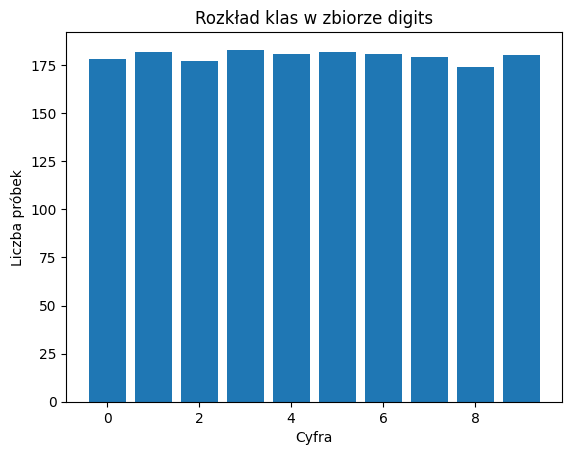


 3.3. Podstawowe statystyki cech
        count       mean       std  min   25%   50%   75%   max
pix_0  1797.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0
pix_1  1797.0   0.303840  0.907192  0.0   0.0   0.0   0.0   8.0
pix_2  1797.0   5.204786  4.754826  0.0   1.0   4.0   9.0  16.0
pix_3  1797.0  11.835838  4.248842  0.0  10.0  13.0  15.0  16.0
pix_4  1797.0  11.848080  4.287388  0.0  10.0  13.0  15.0  16.0

 3.4. Korelacja między cechami
Średnia wartość bezwzględna korelacji między cechami: nan


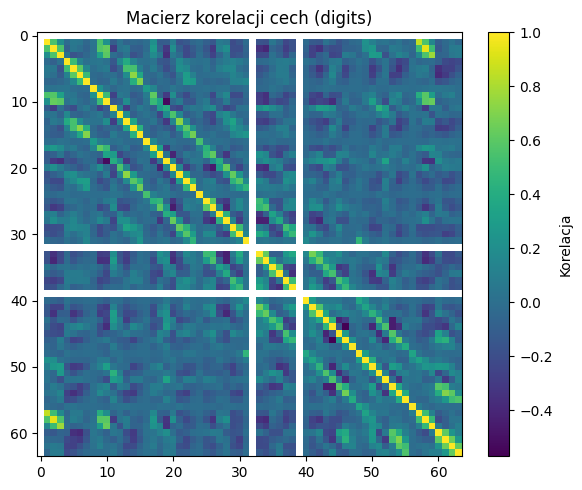


 3.5. Wartości odstające (prosty z-score)
Liczba wartości odstających (|z| > 3): 774

 3.6. Przykładowe obrazy cyfr


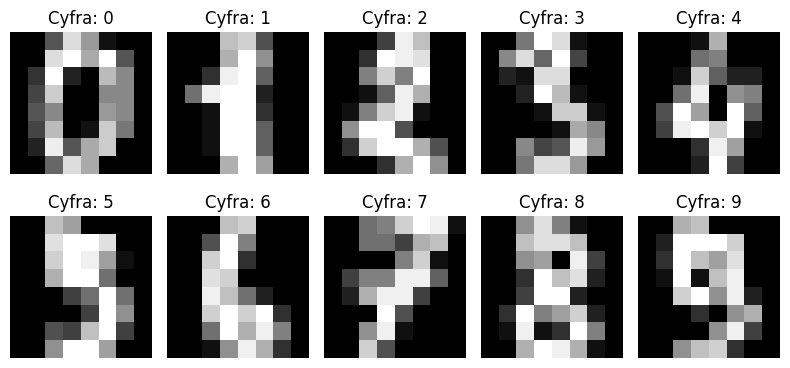


 5. Trenowanie sieci neuronowej (MLPClassifier)

 6. Metryki jakości
Accuracy (dokładność) na zbiorze testowym: 0.9667

Macierz pomyłek:
 [[35  0  0  0  1  0  0  0  0  0]
 [ 0 33  1  1  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  1  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  1  1 34]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.92      0.92        36
           2       0.95      1.00      0.97        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.94      0.97        36
           7       0.97      1.00      0.99        36
           8       0.

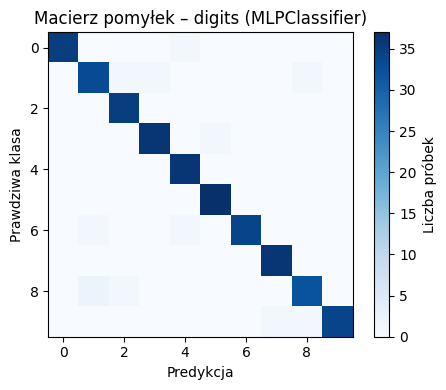


 7. Przykładowe błędne klasyfikacje
Pokazuję 10 przykładowych błędów z 12.


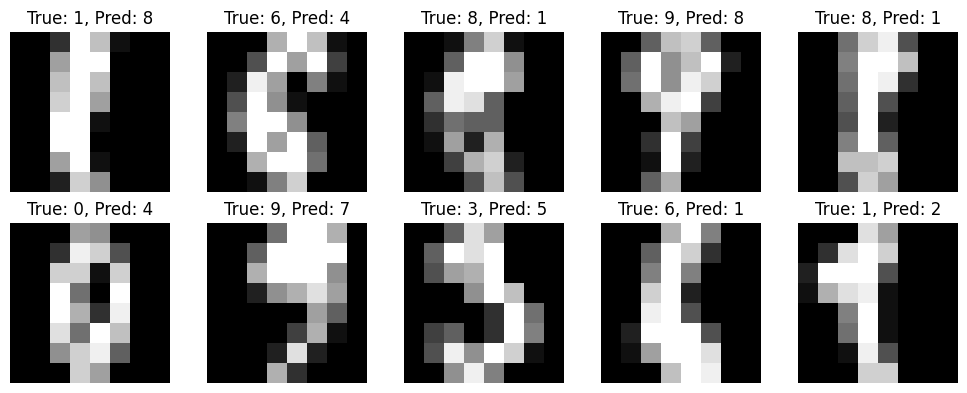


 Koniec analizy i klasyfikacji


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)


digits = load_digits()
X = digits.data
y = digits.target

print("Kształt X:", X.shape)
print("Kształt y:", y.shape)
print("Unikalne klasy i liczności:", np.unique(y, return_counts=True))

df = pd.DataFrame(X, columns=[f"pix_{i}" for i in range(X.shape[1])])
df["target"] = y

print("\n 3.1. Brakujące dane")
missing_total = df.isna().sum().sum()
print("Całkowita liczba braków danych (NaN):", missing_total)
print("Braki w pierwszych kilku kolumnach:\n", df.isna().sum().head())

print("\n 3.2. Rozkład klas (target)")
unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cyfra {u}: {c} próbek")

plt.figure()
plt.bar(unique, counts)
plt.xlabel("Cyfra")
plt.ylabel("Liczba próbek")
plt.title("Rozkład klas w zbiorze digits")
plt.show()

print("\n 3.3. Podstawowe statystyki cech")
print(df.drop(columns="target").describe().T.head())

print("\n 3.4. Korelacja między cechami")
corr = df.drop(columns="target").corr()
upper_tri = np.triu_indices_from(corr, k=1)
mean_abs_corr = np.mean(np.abs(corr.values[upper_tri]))
print("Średnia wartość bezwzględna korelacji między cechami:", mean_abs_corr)

plt.figure(figsize=(6, 5))
plt.imshow(corr, aspect="auto")
plt.colorbar(label="Korelacja")
plt.title("Macierz korelacji cech (digits)")
plt.tight_layout()
plt.show()

print("\n 3.5. Wartości odstające (prosty z-score)")
X_features = df.drop(columns="target").values
means = X_features.mean(axis=0)
stds = X_features.std(axis=0, ddof=0)
stds[stds == 0] = 1e-9
Z = (X_features - means) / stds
outliers = np.sum(np.abs(Z) > 3)
print("Liczba wartości odstających (|z| > 3):", outliers)

print("\n 3.6. Przykładowe obrazy cyfr")
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for ax, idx in zip(axes.ravel(), range(10)):
    ax.imshow(digits.images[idx], cmap="gray")
    ax.set_title(f"Cyfra: {y[idx]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("\n 5. Trenowanie sieci neuronowej (MLPClassifier)")
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print("\n 6. Metryki jakości")
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (dokładność) na zbiorze testowym: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nMacierz pomyłek:\n", cm)

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.colorbar(label="Liczba próbek")
plt.xlabel("Predykcja")
plt.ylabel("Prawdziwa klasa")
plt.title("Macierz pomyłek – digits (MLPClassifier)")
plt.tight_layout()
plt.show()

print("\n 7. Przykładowe błędne klasyfikacje")
mis_idx = np.where(y_test != y_pred)[0]

if len(mis_idx) == 0:
    print("Brak błędnych klasyfikacji (model trafił wszystkie przykłady testowe).")
else:
    n_to_show = min(10, len(mis_idx))
    print(f"Pokazuję {n_to_show} przykładowych błędów z {len(mis_idx)}.")

    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for ax, idx in zip(axes.ravel(), mis_idx[:n_to_show]):
        img = X_test[idx].reshape(8, 8)
        ax.imshow(img, cmap="gray")
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

print("\n Koniec analizy i klasyfikacji")